# LinearDiscriminantAnalysis (LDA)

In [1]:

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import sys
sys.path.append("../../my-staff")
from database import load_ds

# Cargar dataset

In [2]:
X, y, features_names, class_names = load_ds("all")
X.shape

(293, 25)

In [3]:
X_train, y_train, _, _ = load_ds("train")
X_train.shape

(205, 25)

In [4]:
X_test, y_test, _, _ = load_ds("test")
X_test.shape

(88, 25)

In [5]:
from utils import grid_search_no_fss, SEED

In [6]:
model = LDA()

In [7]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'priors': [None, [0.1, 0.9], [0.5, 0.5], [0.9, 0.1]],
    'tol': [1e-4, 1e-5, 1e-6]
}


In [8]:
result = grid_search_no_fss(X_train, y_train, model, param_grid)

Starting evaluation with all variables
f1 0.7541151235268883


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/a

In [9]:
result

ResultGridSearch(best_model=LinearDiscriminantAnalysis(priors=[0.5, 0.5]), best_num_features=205, selected_feature_names=['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Ascites_N', 'Ascites_Y', 'Drug_D-penicillamine', 'Drug_Placebo', 'Spiders_N', 'Spiders_Y', 'Sex_F', 'Sex_M', 'Edema_N', 'Edema_S', 'Edema_Y'], best_score=0.7541151235268883)

In [10]:
best_model = result.best_model

In [11]:
hipers = best_model.get_params()
hipers

{'covariance_estimator': None,
 'n_components': None,
 'priors': [0.5, 0.5],
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [12]:
features = result.selected_feature_names
features

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Ascites_N',
 'Ascites_Y',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Spiders_N',
 'Spiders_Y',
 'Sex_F',
 'Sex_M',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

# Training the model

In [13]:
model = LDA(**hipers)

In [14]:
model.fit(X_train[features], y_train)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

# Evaluation

In [15]:
from utils import eval_model

In [16]:
print("Training score: ", model.score(X_train[features], y_train))
print("Test score: ", model.score(X_test[features], y_test))

Training score:  0.8390243902439024
Test score:  0.8409090909090909


In [17]:
y_prob = model.predict_proba(X_test[features])[:,0]
y_pred = model.predict(X_test[features])
eval_model(y_true= y_test, y_pred=y_pred, y_prob=y_prob)

Métricas de evaluación:
Precision: 0.8457
Recall: 0.8409
F1-score: 0.8416
Brier Score: 0.6169


# Visualización del modelo

In [18]:

import pandas as pd
import seaborn as sns


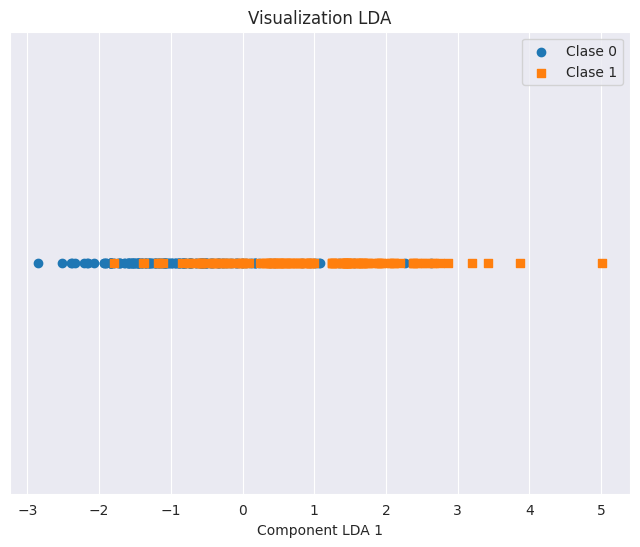

In [19]:
# Ajustar el modelo LDA al conjunto de datos
X_lda = model.fit_transform(X, y)

# Crear un gráfico de dispersión en el espacio de proyección LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], [0] * len(X_lda[y == 0]), label="Clase 0", marker='o')
plt.scatter(X_lda[y == 1], [0] * len(X_lda[y == 1]), label="Clase 1", marker='s')
plt.xlabel("Component LDA 1")
plt.yticks([])
plt.legend()
plt.title("Visualization LDA")
plt.show()

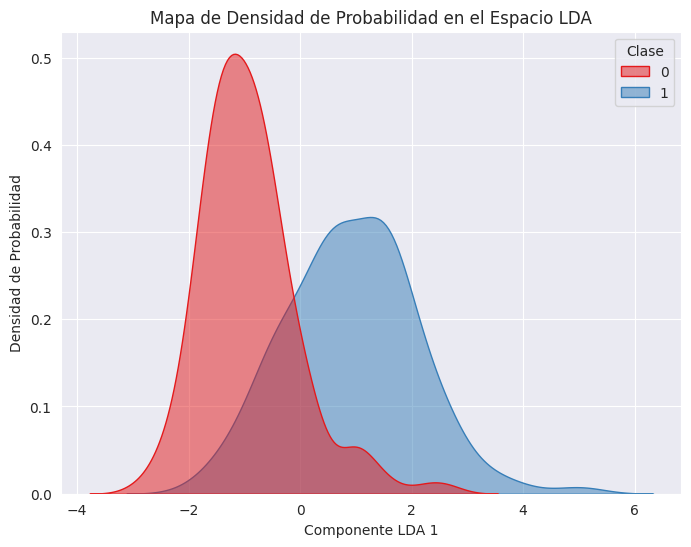

In [20]:
data = pd.DataFrame({'LDA_Component': X_lda[:, 0], 'Clase': y})

# Crear un gráfico de densidad de probabilidad para cada clase
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x="LDA_Component", hue="Clase", fill=True, common_norm=False, alpha=0.5, palette="Set1")
plt.title("Mapa de Densidad de Probabilidad en el Espacio LDA")
plt.xlabel("Componente LDA 1")
plt.ylabel("Densidad de Probabilidad")
plt.show()

In [7]:
import pandas as pd

In [8]:
model = LDA()
model.fit(X,y)

LinearDiscriminantAnalysis()

In [9]:
coeficientes = model.coef_

# Crear un DataFrame para mostrar los coeficientes
coeficientes_df = pd.DataFrame(coeficientes, columns=features_names)
coeficientes_df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Spiders_Y,Hepatomegaly_N,Hepatomegaly_Y,Ascites_N,Ascites_Y,Edema_N,Edema_S,Edema_Y,Sex_F,Sex_M
0,-0.000827,0.037221,0.025133,0.001377,0.255819,0.002606,0.000328,0.007552,0.000812,-0.000374,...,0.092546,-0.347939,0.347939,-0.556594,0.556594,0.003658,0.108613,-0.160653,-0.545033,0.545033


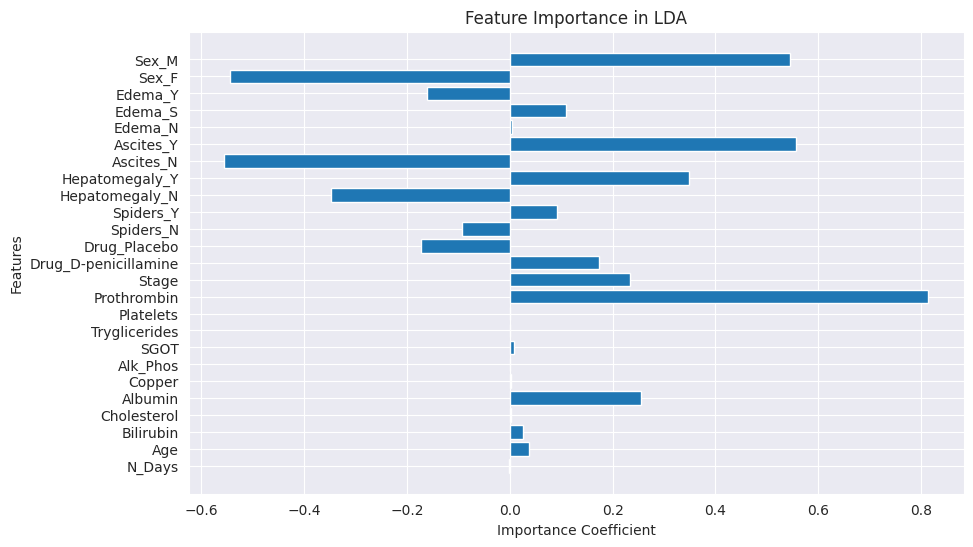

In [10]:
# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(features_names, coeficientes_df.values[0])
plt.xlabel('Importance Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance in LDA')
plt.show()

Esto te ayudará a entender la superposición entre clases.

Valores Positivos y Negativos: Los coeficientes pueden ser positivos o negativos. Los valores positivos indican que una característica contribuye positivamente a una clase, es decir, cuando el valor de esa característica aumenta, la probabilidad de pertenecer a esa clase también aumenta. Los valores negativos tienen el efecto opuesto.

Magnitud de los Coeficientes: La magnitud de los coeficientes refleja la importancia relativa de una característica en la separación de clases. Cuanto mayor sea el valor absoluto de un coeficiente, más influencia tiene en la proyección LDA y, por lo tanto, en la separación de clases.

Características Relevantes: Las características con coeficientes positivos grandes son las más relevantes para una clase específica. Por otro lado, las características con coeficientes negativos grandes son relevantes para la otra clase. Puedes identificar cuáles características son las más importantes para cada clase en el gráfico.

Características No Relevantes: Las características con coeficientes cercanos a cero tienen una influencia mínima en la separación de clases y, por lo tanto, se consideran menos relevantes.



In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


In [18]:
model = QDA(store_covariance=True)
model.fit(X,y)

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(store_covariance=True)

In [30]:
covariance_matrices = model.covariance_
len(covariance_matrices)

2

In [27]:

# Display the matrices
for i, cov_matrix in enumerate(covariance_matrices):
    print(f"Covariance Matrix for Class {i}:\n", pd.DataFrame(cov_matrix), "\n")
    break

AttributeError: 'list' object has no attribute 'shape'

In [23]:
import seaborn as sns

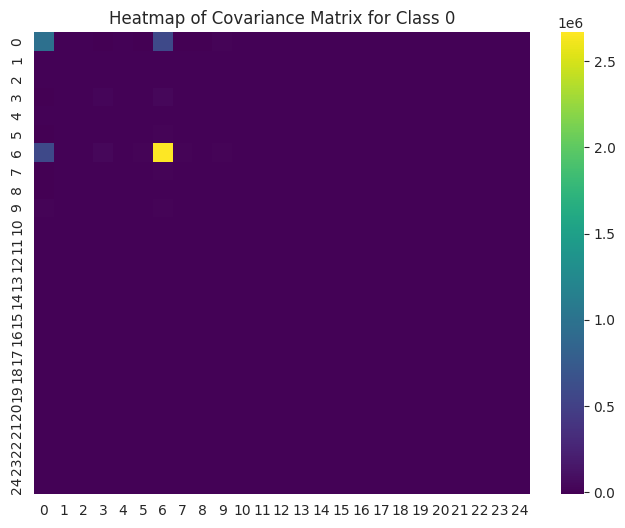

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(covariance_matrices[0]), fmt='g', cmap='viridis')
plt.title('Heatmap of Covariance Matrix for Class 0')
plt.show()

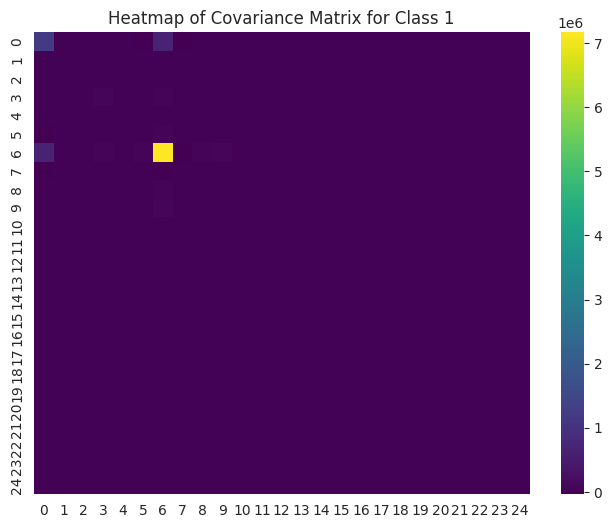

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(covariance_matrices[1]), fmt='g', cmap='viridis')
plt.title('Heatmap of Covariance Matrix for Class 1')
plt.show()